<a href="https://colab.research.google.com/github/irsyadmaulana85/Time-series-forecast-oil-store-ecuador/blob/main/Kelompok8_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 align=center><font size = 5> Kelompok 8 - Time Series Forecating </font></h1>

**Class : B7**

**Anggota :**

1. Mohammad Irsyad Maulana (DBA2177245)
2. Walidatush Sholihah     (DBA2244056)
3. Zaahirotus Salsabila (DBA2324117)
4. Nida Amalia Aliyatunnaim (DBA2028127)

## 1 Business Understanding

#### 1.1 Deskripsi

Data yang digunakan merupakan data perkembangan bisnis pada toko retailer yang terdapat di negara Ekuador. Favorita stores adalah perusahaan yang membantu pergerakkan pertumbuhan ekonomi negara Ekuador. Pemerintah meminta bantuan scientist dalam memprediksi hal mengenai ketersediaan bahan yang dibutuhkan di masa depan. Jika prediksi a little over, maka akan membuat overstocked, jika little under, maka barang akan langka. Prediksi dibutuhkan untuk memastikan keinginan konsumen dalam ketersediaan barang.

https://colab.research.google.com/drive/1bcHR6jLseZe4Wi-ScxnunmZS_fJvmtG6?usp=sharing



#### 1.2 Problem
Jika prediksi a little over, maka akan membuat ketersediaan barang menjadi overstocked, jika prediksi little under, maka ketersediaan barang akan menjadi langka. Prediksi yang baik dibutuhkan untuk memastikan keinginan konsumen dalam ketersediaan barang, agar menghindari mengurangnya lost revenue.

#### 1.3 Tujuan
Prediksi penjualan produk yang terjual di Favorita stores, yang berlokasi di Ekuador. Forecast dilakukan dengan data latih mencakupi, tanggal, informasi produk penjualan, promosi dan juga angka penjualan.

## 2 Data Understanding

Data yang digunakan diambil dari : https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data?select=oil.csv

Data tersebut terdiri dari 2 kolom dimana :


*   Kolom pertama berisi variabel date (tanggal)
*   Kolom kedua berisi variabel dcoilwtico(daily oil price) yang merupakan variabel yang akan diprediksi



#### 2.1 Import Libraries

In [ ]:
import pandas as pd                  
import numpy as np                  
from math import sqrt                
from pandas import Series  

from datetime import datetime         
import warnings                       
warnings.filterwarnings('ignore')     
import sys                           
import itertools    
                                      

from matplotlib import pyplot       
from matplotlib.pyplot import figure  
import matplotlib.pyplot as plt       
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') 
from matplotlib.pylab import rcParams 
                                      
import statsmodels.api as sm          
import statsmodels.tsa.api as smt     
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt  
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima_model import ARIMA  
import statsmodels.formula.api as smf 
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 
                
                                      
import seaborn as sns                 
%matplotlib inline   
import matplotlib.dates as mdates
import matplotlib.pyplot as plty


#### 2.2 Import Data

In [ ]:
data=pd.read_csv('/content/oil.csv')

data.shape

(1218, 2)

In [ ]:
data.head() 

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
data.tail()

,date,dcoilwtico
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


#### 2.3 Explonatory Data Analysis

##### 2.3.1 Eksplorasi Data

In [ ]:
data.columns 

Index(['date', 'dcoilwtico'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
data = data.dropna()

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 1 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1175 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.5+ KB


##### 2.3.2 Analisis Deskriptif

In [ ]:
data.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


##### 2.3.3 Visualisasi Data

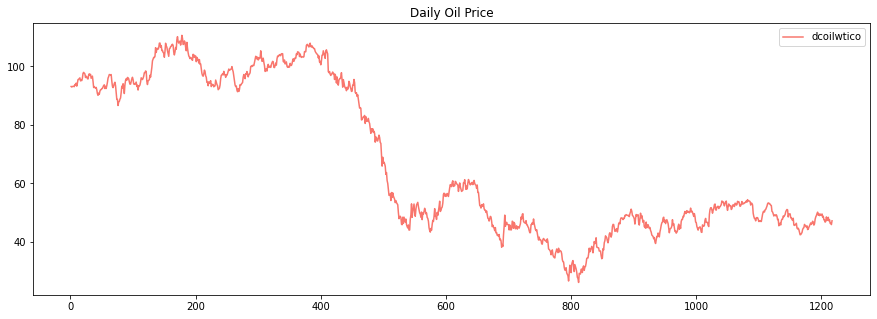

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
data.plot(style='-', figsize=(15,5), color=color_pal[0], title="Daily Oil Price")
plt.show()

Gambar di atas merupakan visualisasi dari pergerakkan harga minyak per hari, yang digambarkan dari rentang tahun 2013-2017

## 3 Data Preparation

#### 3.1 Mengubah Tipe Data

In [ ]:
# Pada kolom date, ubah tipe data menjadi datetime
data['date']=pd.to_datetime(data['date'], infer_datetime_format=True)


In [ ]:
# Mengecek tipe data kembali
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 1 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1175 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.5 KB


#### 3.2 Mengubah Kolom menjadi Index

In [ ]:
data = data.set_index(['date'])
data

,dcoilwtico
date,
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
2013-01-08,93.21
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


#### 3.3 Data Analysis

##### 3.3.1 Stationarity Check - Rolling Statistic test

In [ ]:
rolmean=data.rolling(window=12).mean()  
rolstd=data.rolling(window=12).std() 

print('15 baris pertama rolling mean: ')
print(rolmean.head(15))                
print ('')

print('15 baris pertama std. deviasi: ')
print(rolstd.head(15))         

15 baris pertama rolling mean: 
            dcoilwtico
date                  
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-07         NaN
2013-01-08         NaN
2013-01-09         NaN
2013-01-10         NaN
2013-01-11         NaN
2013-01-14         NaN
2013-01-15         NaN
2013-01-16         NaN
2013-01-17   93.619167
2013-01-18   93.825000
2013-01-22   94.085000
2013-01-23   94.246667

15 baris pertama std. deviasi: 
            dcoilwtico
date                  
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-07         NaN
2013-01-08         NaN
2013-01-09         NaN
2013-01-10         NaN
2013-01-11         NaN
2013-01-14         NaN
2013-01-15         NaN
2013-01-16         NaN
2013-01-17    0.742238
2013-01-18    0.918769
2013-01-22    1.081812
2013-01-23    1.069378


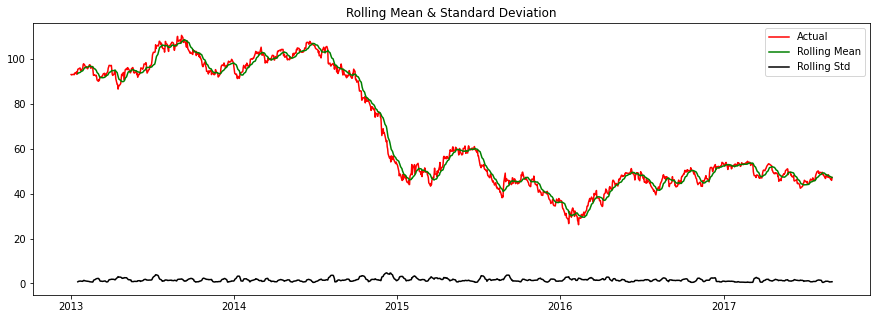

In [ ]:
plt.figure(figsize=(15,5))

actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

> **Insights:**

Dari grafik di atas kita dapat melihat bahwa data aktual dan rolling dan std memiliki bentuk yang cukup berbeda, menandakan bahwa **series** ini **tidak stasioner**.

##### 3.3.2 Stationarity Check - Augmented Dickey-Fuller (ADF) test

* Selanjutnya, kita akan gunakan ADF test untuk uji stasioner dimana: 

  **H0:** *The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.*

 **H1:** *The time series is stationary.*

* Jika p-value test kurang dari significance level (contoh alpha = 0.05) dan nilai ADF test lebih kecil dibandingkan critical values maka kita dapat reject null hypothesis dan dapat menyimpulkan bahwa time series adalah stasioner.

In [ ]:
print('Dickey-Fuller Test: ')
dftest=adfuller(data['dcoilwtico'], autolag='AIC')
dftest

Dickey-Fuller Test: 


(-0.8771776701964072,
 0.7953952087184238,
 1,
 1173,
 {'1%': -3.435937099783359,
  '10%': -2.5680835504811657,
  '5%': -2.864007125872554},
 3748.673557033254)

In [ ]:
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('Dickey-Fuller Test: ')
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            -0.877178
p-value                    0.795395
Lags Used                  1.000000
No. of Obs              1173.000000
Critical Value (1%)       -3.435937
Critical Value (5%)       -2.864007
Critical Value (10%)      -2.568084
dtype: float64


> **Insights:**

Nilai ADF statistic yang jauh lebih besar dari critical values pada semua level, dan juga p-value yang lebih besar dari 0.05 turut menandakan, **kita gagal menolak null hypothesis pada 90%, 95%, dan 99% tingkat keyakinan**, yang **mengindikasikan** bahwa **data time series ini non-stationary.**

* Berdasarkan insights di atas, maka kita akan mencoba menstabilkan variance dengan cara log transformation pada data Oil dengan ``` np.log() ```

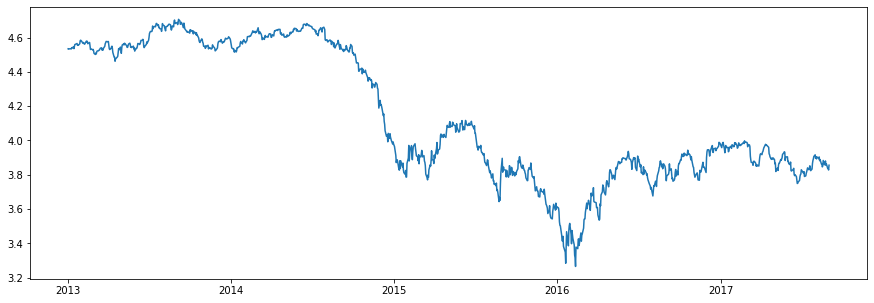

In [ ]:
plt.figure(figsize=(15,5))
data_log=np.log(data) 
plt.plot(data_log)

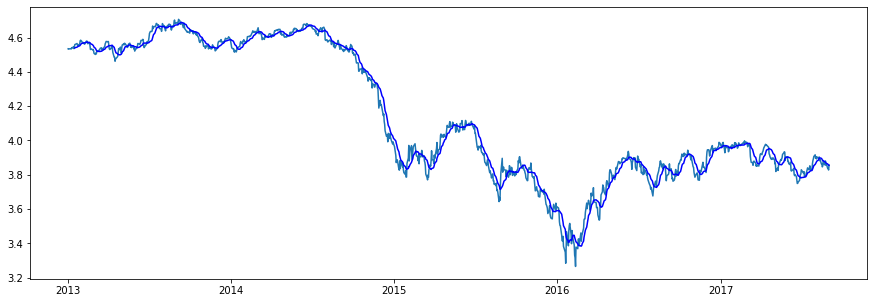

In [ ]:
plt.figure(figsize=(15,5))

MAvg=data_log.rolling(window=12).mean() 
MStd=data_log.rolling(window=12).std()

plt.plot(data_log)
plt.plot(MAvg, color='blue')
#plt.plot(MStd, color='red')

In [ ]:
data_log_diff=data_log-MAvg

data_log_diff.head(12)

,dcoilwtico
date,
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-07,NaN
2013-01-08,NaN
2013-01-09,NaN
2013-01-10,NaN
2013-01-11,NaN
2013-01-14,NaN


In [ ]:
data_log_diff=data_log_diff.dropna() 
data_log_diff.head()

,dcoilwtico
date,
2013-01-17,0.019815
2013-01-18,0.018890
2013-01-22,0.021147
2013-01-23,0.008652
2013-01-24,0.009797


In [ ]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation per Year')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['dcoilwtico'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

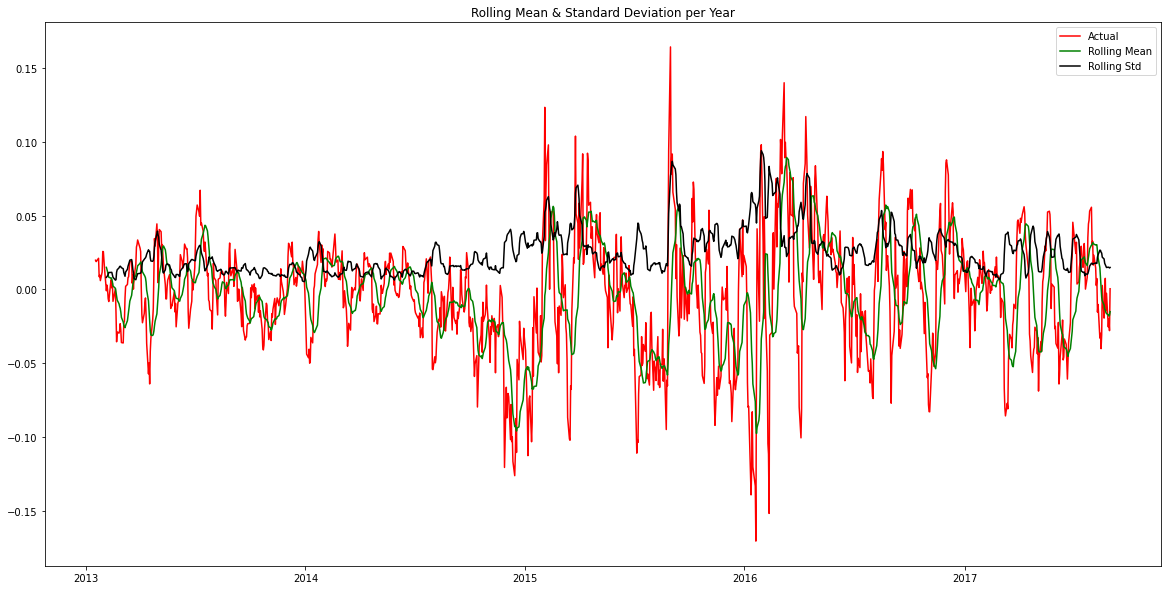

Dickey-Fuller Test: 
Test Statistic         -9.444618e+00
p-value                 4.792553e-16
Lags Used               5.000000e+00
No. of Obs              1.158000e+03
Critical Value (1%)    -3.436010e+00
Critical Value (5%)    -2.864039e+00
Critical Value (10%)   -2.568101e+00
dtype: float64


In [ ]:
stationarity(data_log_diff)

 **Insights:**

* Dapat dilihat dari hasil Dickey-Fuller test ini, bahwa untuk tingkat keyakinan 5% dan 10% sudah menunjukkan series ini stasioner dimana p-value 4.792553e-16 yang < 0.05 menunjukkan bahwa kita menolak null hypothesis (reject to fail H0, accept H1), dan menyatakan bahwa series ini stasioner.

* kita dapat melihat hasil melalui Dickey-Fuller test ini bahwa **nilai t-value (-9.444618e+00) < DF critical value 1% (-3.436010e+00)** maka kita dapat **menolak null hypothesis**, dengan 90%, 95%, dan 99% tingkat keyakinan menyatakan bahwa series ini sudah stasioner.


## 4 Modeling

#### 4.1 Membagi data menjadi data train dan data test

In [ ]:
# Membagi data kita menjadi data latih (data_train) dan data uji (data_test)

# Jika datanya kecil (ratusan jumlah datanya) pakai 0.2 #80% untuk data latih, 20% untuk data uji
# Jika datanya sedang (ribuan jumlah datanya) pakai 0.15
# Jika datanya banyak (jutaan jumlah datanya) pakai 0.1
test_ratio = 0.15

test_set_size = int(len(data) * test_ratio)
data_train = data[0:-test_set_size].copy()
data_test = data[-test_set_size:].copy()

In [ ]:
data_test

,dcoilwtico
date,
2016-12-19,52.13
2016-12-20,52.22
2016-12-21,51.44
2016-12-22,51.98
2016-12-23,52.01
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


In [ ]:
data_train

,dcoilwtico
date,
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
2013-01-08,93.21
...,...
2016-12-12,52.74
2016-12-13,52.99
2016-12-14,51.01


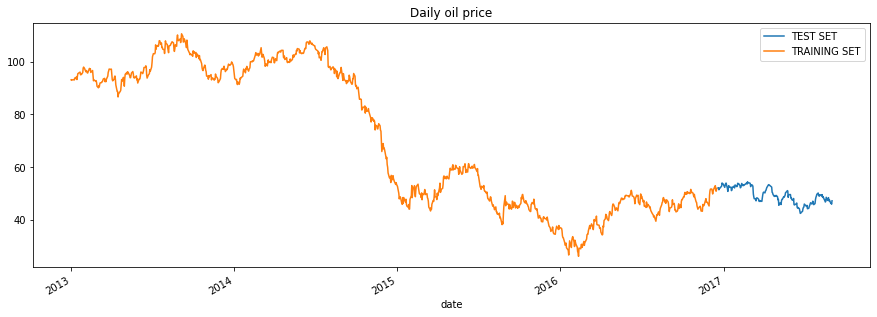

In [ ]:
# Melihat hasil pembagian data kita menggunakan visualisasi
data_test \
    .rename(columns={'dcoilwtico': 'TEST SET'}) \
    .join(data_train.rename(columns={'dcoilwtico': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title="Daily oil price", style='-')
plt.show()

Gambar di atas merupakan visualisasi dari pembagian data train dan data test dengan rasio 0.15 

#### 4.2 HoltWinters

In [ ]:
# HoltWinters Machine Learning

model_data = ExponentialSmoothing(np.asarray(data_train['dcoilwtico']),
                                  seasonal_periods=176, trend= None, #seasonal period = memprediksi berapa bulan
                                  seasonal= "mul").fit(optimized = True)

In [ ]:
# Pengujian Machine Learning Kita

data_Holt = data_test.copy() 
data_Holt['Holt'] = model_data.forecast(len(data_test['dcoilwtico']))

In [ ]:
# Menampilkan hasil prediksi kita
data_Holt

,dcoilwtico,Holt
date,,
2016-12-19,52.13,51.213671
2016-12-20,52.22,51.945260
2016-12-21,51.44,51.610910
2016-12-22,51.98,51.652153
2016-12-23,52.01,51.850432
...,...,...
2017-08-25,47.65,52.546311
2017-08-28,46.40,52.755271
2017-08-29,46.46,53.096329


In [ ]:
#params untuk mengubah data pada variabel model_data menjadi sebuah dictionary
model_data.params 

{'damping_slope': nan,
 'initial_level': 75.10987098084345,
 'initial_seasons': array([1.30647337, 1.26068351, 1.22951653, 1.24732967, 1.24078786,
        1.24174854, 1.24178631, 1.24894926, 1.24867645, 1.25406925,
        1.25356209, 1.26822434, 1.27047176, 1.27586381, 1.26985414,
        1.26927473, 1.27377465, 1.29148424, 1.28267496, 1.29924436,
        1.3017071 , 1.29326583, 1.28555242, 1.28992618, 1.28030753,
        1.28110774, 1.28303386, 1.28443663, 1.28816638, 1.28823579,
        1.29368681, 1.28231471, 1.28071373, 1.26091565, 1.24775553,
        1.23919837, 1.23232948, 1.23600631, 1.2276646 , 1.22317823,
        1.21393239, 1.21414757, 1.20498459, 1.2138974 , 1.22080675,
        1.21036163, 1.22521475, 1.23415734, 1.22949202, 1.24213598,
        1.241583  , 1.24217298, 1.24345451, 1.23192067, 1.23619523,
        1.23715202, 1.26841964, 1.27919291, 1.27770811, 1.29440758,
        1.28596885, 1.2831697 , 1.26702164, 1.25093819, 1.23739968,
        1.25144615, 1.25633982, 1.233

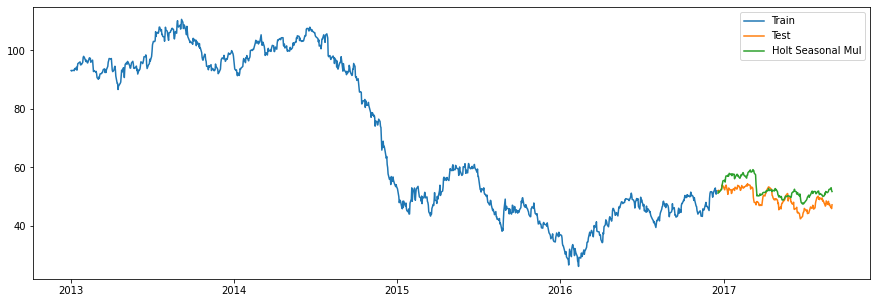

In [ ]:
# visualisasi hasil forecast dari model HoltWinters dengan data aktual
plt.figure(figsize=(15,5))
plt.plot(data_train['dcoilwtico'], label='Train')
plt.plot(data_test['dcoilwtico'], label='Test')
plt.plot(data_Holt['Holt'], label='Holt Seasonal Mul')
plt.legend(loc=0)

Gambar di atas merupakan visualisasi data train (biru), data (test), dan data prediksi dengan menggunakan HoltWinters (Hijau). Dapat dilihat sebaran data prediksi dengan HoltWinters tidak terlalu jauh dengan data test.

#### 4.3 Sarimax

In [ ]:
# Machine Learning Kedua -> Sarimax

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

# INI PENTINGGG BANGETTTT 
train_log = np.log10(data_train['dcoilwtico'])

for param in pdq: #Non-Seasonal
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_log,
                                             order = param,
                                             seasonal_order = param_seasonal)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal #Store the best param values : AIC, P, D, Q [Non-S / Seas]
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))


Best SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 model - AIC:-6311.089527028917


In [ ]:
# Pelatihan Machine Learning Kita

mod = sm.tsa.statespace.SARIMAX(train_log,
                                order=(0,1,1),
                                seasonal_order=(0,0,0,12),
                                enforce_stationarity=True)

best_results = mod.fit()

In [ ]:
# Pengujian Machine Learning Kita

hasil_prediksi_kedua = best_results.get_forecast(steps=len(data_test)+1, alpha=0.1)
data_hasil_prediksi_kedua = data_test.copy()
data_hasil_prediksi_kedua['hasil_prediksi'] = np.power(10, hasil_prediksi_kedua.predicted_mean).astype(int)

In [ ]:
# Menampilkan hasil prediksi data
data_hasil_prediksi_kedua

,dcoilwtico,hasil_prediksi
date,,
2016-12-19,52.13,NaN
2016-12-20,52.22,NaN
2016-12-21,51.44,NaN
2016-12-22,51.98,NaN
2016-12-23,52.01,NaN
...,...,...
2017-08-25,47.65,NaN
2017-08-28,46.40,NaN
2017-08-29,46.46,NaN


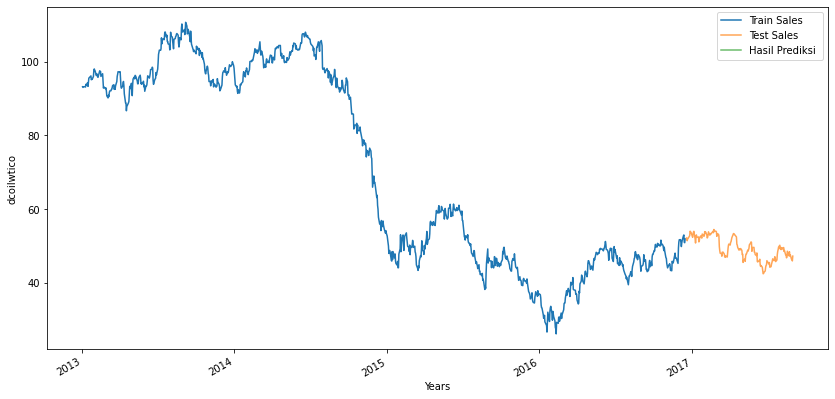

In [ ]:
# Visualisasi perbandingan antara hasil prediksi machine learning dengan data asli -> SARIMAX
axis = data_train['dcoilwtico'].plot(label='Train Sales', figsize=(14, 7))
data_hasil_prediksi_kedua['dcoilwtico'].plot(ax=axis, label='Test Sales', alpha=0.7)
data_hasil_prediksi_kedua['hasil_prediksi'].plot(ax=axis, label='Hasil Prediksi ', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('dcoilwtico')
plt.legend(loc='best')
plt.show()
plt.close()

## 5 Evaluation

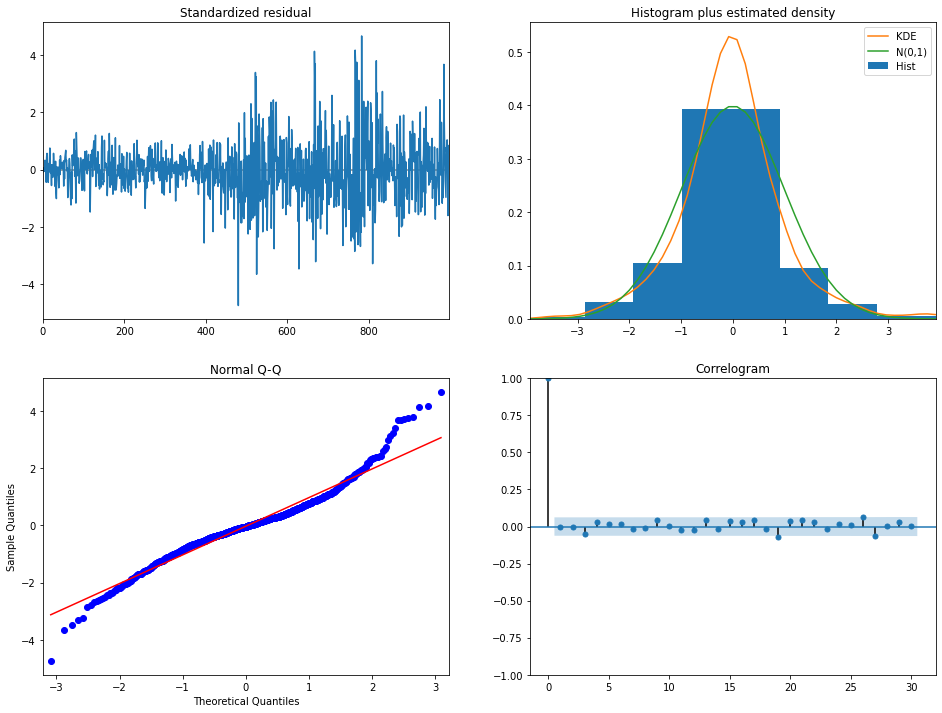

In [ ]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

* Grafik standardized residuals menunjukkan bahwa sebagian besar titik sudah berada pada y=0 yang berarti bahwa prediksi tidak menyimpang jauh dari data aktual.

* Grafik histogram sudah menunjukkan kecenderungan normal (garis hijau adalah grafik garis dari ujung histogram) dan KDE menunjukkan grafik kecocokan prediksi.

* Q–Q plot adalah probability plot, yang mana digunakan untuk mengecek apakah data kita berada pada garis normal. Dapat dilihat pada gambar bahwa sebagian sebaran datanya sudah mengikuti garis normal, namun ada beberapa yang lumayan jauh dari garis normal.

* Correlogram, juga dikenal sebagai Auto Correlation Function (ACF) plot, merupakan cara grafis untuk memperlihatkan korelasi serial pada data yang tidak selalu konstan dalam kurun waktu tertentu. Correlogram akan memperlihatkan gambaran apakah terdapat auto-correlation diantara pasangan data pada kurun waktu yang berbeda.

In [ ]:
# Hitung MAE pada model HoltWinters menggunakan function yang dibuat dari awal
def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 

# Hitung MAPE pada model HoltWinters
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung MSE dan RMSE pada model HoltWinters
mse = ((data_test['dcoilwtico'] - data_Holt['Holt']) ** 2).mean()
rmse = np.sqrt(mse)

print('Mean Absolute Error of our forecasts is ', mean_absolute_error(data_test['dcoilwtico'],data_Holt['Holt']).round(3))
print('Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(data_test['dcoilwtico'],data_Holt['Holt']).round(2), ' %')
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 3)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

Mean Absolute Error of our forecasts is  3.513
Mean Absolute Percentage Error of our forecasts is  7.23  %
The Mean Squared Error of our forecasts is 16.951
The Root Mean Squared Error of our forecasts is 4.117




Karena nilai MAPE sebesar 6,76% dimana <10% maka dapat disimpulkan bahwa hasil prediksi menggunakan HoltWinters sangat akurat



## 6 Deployment

Tahap Deployment dapat dilakukan setelah model selesai dari tahap evaluasi. Kemudian model akan diterapkan ke dalam sebuah data baru yang diterapkan secara langsung. Namun pada hal ini, pengerjaan berlangsung  hanya sampai pada tahap evaluasi.